In [1]:
import matplotlib.pyplot as plt
from datasets import load_dataset

sample_data_config = {
    "dataset": "MNIST",
    "batch_size": 32,
    "count_sampling": "EXACT",
    "pixel_sampling": "EXACT"
}

train_loader, val_loader, test_loader, image_shape = load_dataset(sample_data_config)

# Partial observations

This notebook showcases types of partial observations

## Count sampling

### Variable count sampling

With some precentage variates between a count and 0

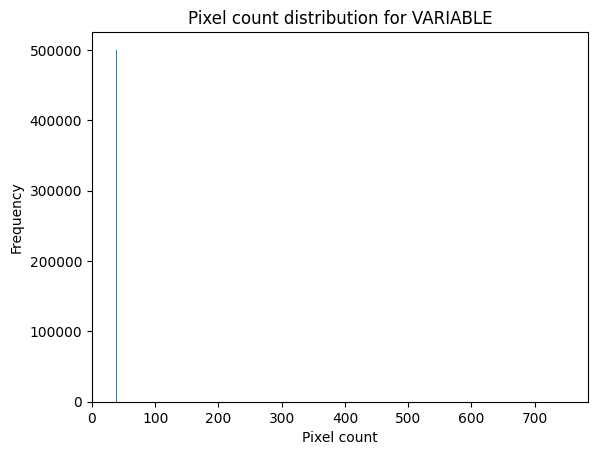

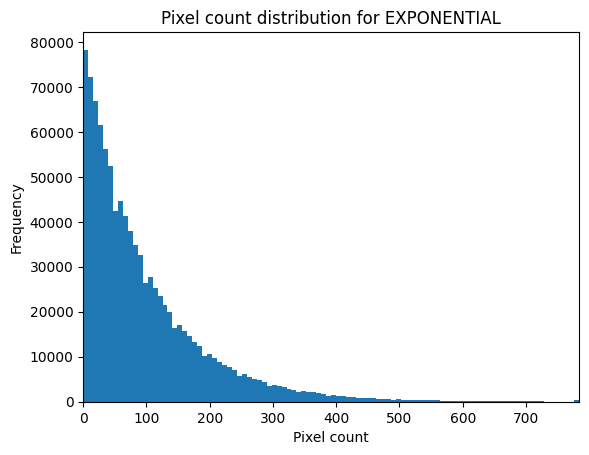

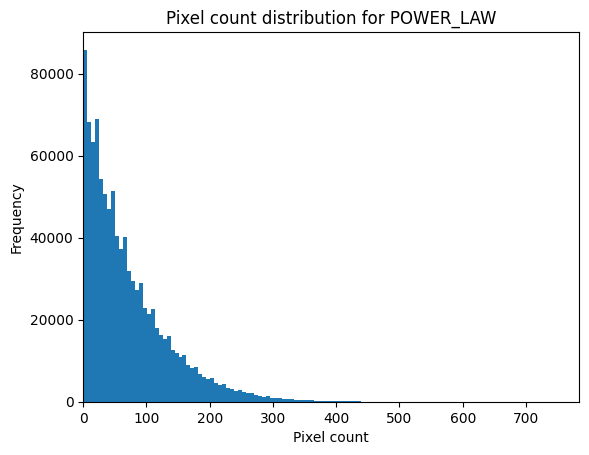

In [2]:
from datasets.observations import CountSamplingMethod

methods = [CountSamplingMethod.VARIABLE, CountSamplingMethod.EXPONENTIAL, CountSamplingMethod.POWER_LAW]

image = next(iter(train_loader))[0][0]

for method in methods:
    sampler = method.get_sampler()
    counts = []
    for i in range(1_000_000):
        counts.append(sampler.get_pixel_count(image))

    bins = 100
    plt.title(f"Pixel count distribution for {method.name}")
    plt.xlabel("Pixel count")
    plt.ylabel("Frequency")
    plt.xlim(0, image_shape[1] * image_shape[2])
    plt.hist(counts, bins=bins)
    plt.show()



In [4]:
from datasets.observations import CountSamplingMethod

variable_sampler = CountSamplingMethod.VARIABLE.get_sampler()

image = next(iter(train_loader))[0][0]

counts = []
for i in range(10_000):
    counts.append(variable_sampler.get_pixel_count(image))

# print frequency of each count
print({count: counts.count(count) for count in set(counts)})


{0: 4979, 39: 5021}


### Exponential count sampling

Uses exponential distribution to sample number of pixels

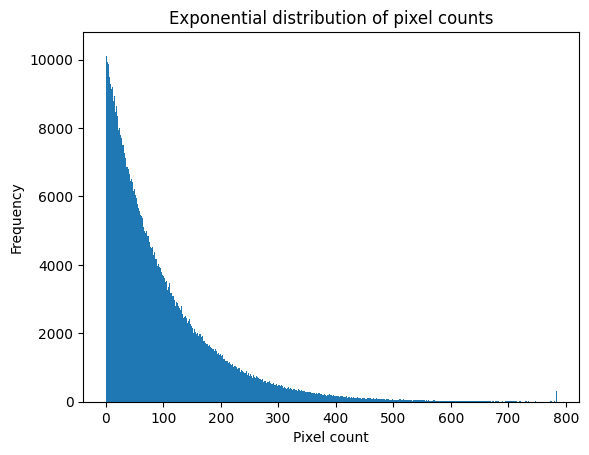

what precentage number 0 is picked?
0.010291
[64, 7, 65, 23, 38, 61, 90, 28, 66, 277, 39, 13, 5, 46, 32, 181, 23, 410, 395, 211, 69, 67, 91, 40, 146, 143, 194, 33, 235, 214, 69, 134, 25, 2, 68, 64, 47, 54, 40, 33, 33, 202, 74, 334, 21, 87, 49, 132, 8, 12, 21, 22, 320, 33, 109, 57, 58, 210, 288, 55, 82, 387, 48, 151, 237, 66, 108, 54, 72, 65, 307, 191, 98, 48, 82, 157, 176, 13, 14, 27, 91, 28, 69, 209, 100, 30, 108, 44, 120, 40, 3, 178, 10, 212, 98, 110, 37, 97, 445, 242]


In [10]:
from datasets.observations import CountSamplingMethod
exponential_sampler = CountSamplingMethod.EXPONENTIAL.get_sampler()

image = next(iter(train_loader))[0][0]

counts = []
for i in range(1000_000):
    counts.append(exponential_sampler.get_pixel_count(image))

min_pixel_count = 0
max_pixel_count = image_shape[1] * image_shape[2]
#range of pixel counts
plt.title("Exponential distribution of pixel counts")
plt.xlabel("Pixel count")
plt.ylabel("Frequency")
plt.hist(counts, bins=max_pixel_count - min_pixel_count)
plt.show()

print("what precentage number 0 is picked?")
print(counts.count(0) / len(counts))
print(counts[:100])

## Pixel Sampling

Three types of sampling implemented:

* Exact

        * Always the same pixels sampled(also the same count of pixels)

* Uniform

        * Samples given number of pixels from uniform distribution (every pixel has equal probability to be sampled)

* Gaussian

        * Sampls pixels from gaussian distribution where the center is the image center. The default std is image_size / 4. The output is clipped to only sample pixels from this image

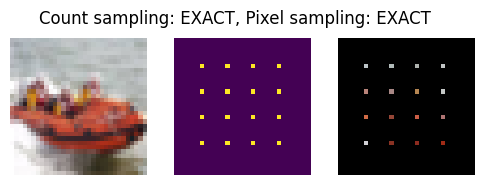

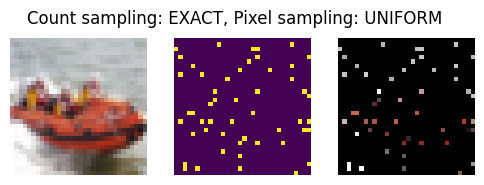

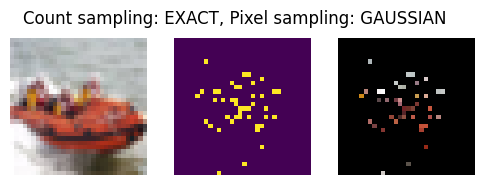

In [2]:
from plotting import plot_conditioned_examples
plot_conditioned_examples(next(iter(train_loader))[0][0])

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def power_law_distribution(size, exponent):
    # Generate a power-law distribution
    pixel_count = 28 * 28
    samples = pixel_count - np.random.power(exponent, size) * pixel_count
    return samples

# Set the size of your image (number of pixels)
image_size = 1000000

# Set the exponent for the power-law distribution
exponent = 10.0

# Generate samples
samples = power_law_distribution(image_size, exponent)

print(f'Average: {np.mean(samples)}')

bins = 28 * 28
# Plot the distribution
plt.hist(samples, bins=200, density=True, alpha=0.75)
plt.title(f'Power-law Distribution (Exponent={exponent})')
plt.xlabel('Sampled Pixels')
plt.ylabel('Probability')
plt.show()

print("what precentage number 0 is picked?")
print(samples.tolist().count(0) / len(samples))

TypeError: only length-1 arrays can be converted to Python scalars